In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from wordcloud import WordCloud



file_path = 'arxiv-data.json'  # Replace with the correct path
nrows_to_read = 100000
dataset = pd.read_json(file_path, lines=True, nrows=nrows_to_read)

In [256]:
# Display initial information
print("Initial Dataset Information:\n")
dataset.info()
print("\nFirst few rows of the initial dataset:\n", dataset.head())

Initial Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  float64
 1   submitter       100000 non-null  object 
 2   authors         100000 non-null  object 
 3   title           100000 non-null  object 
 4   comments        87342 non-null   object 
 5   journal-ref     50741 non-null   object 
 6   doi             61370 non-null   object 
 7   report-no       9465 non-null    object 
 8   categories      100000 non-null  object 
 9   license         56775 non-null   object 
 10  abstract        100000 non-null  object 
 11  versions        100000 non-null  object 
 12  update_date     100000 non-null  object 
 13  authors_parsed  100000 non-null  object 
dtypes: float64(1), object(13)
memory usage: 10.7+ MB

First few rows of the initial dataset:
          id           submitt

In [257]:


missing_values_summary = dataset.isnull().sum()


dataset_cleaned = dataset.dropna(subset=['title', 'abstract'])


dataset_cleaned = dataset_cleaned.drop_duplicates(subset=['title', 'abstract'])

cleaned_info = dataset_cleaned.info()
cleaned_missing_values_summary = dataset_cleaned.isnull().sum()
cleaned_first_rows = dataset_cleaned.head()

missing_values_summary, cleaned_info, cleaned_missing_values_summary, cleaned_first_rows



<class 'pandas.core.frame.DataFrame'>
Index: 99971 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              99971 non-null  float64
 1   submitter       99971 non-null  object 
 2   authors         99971 non-null  object 
 3   title           99971 non-null  object 
 4   comments        87314 non-null  object 
 5   journal-ref     50714 non-null  object 
 6   doi             61343 non-null  object 
 7   report-no       9438 non-null   object 
 8   categories      99971 non-null  object 
 9   license         56761 non-null  object 
 10  abstract        99971 non-null  object 
 11  versions        99971 non-null  object 
 12  update_date     99971 non-null  object 
 13  authors_parsed  99971 non-null  object 
dtypes: float64(1), object(13)
memory usage: 11.4+ MB


(id                    0
 submitter             0
 authors               0
 title                 0
 comments          12658
 journal-ref       49259
 doi               38630
 report-no         90535
 categories            0
 license           43225
 abstract              0
 versions              0
 update_date           0
 authors_parsed        0
 dtype: int64,
 None,
 id                    0
 submitter             0
 authors               0
 title                 0
 comments          12657
 journal-ref       49257
 doi               38628
 report-no         90533
 categories            0
 license           43210
 abstract              0
 versions              0
 update_date           0
 authors_parsed        0
 dtype: int64,
          id           submitter  \
 0  704.0001      Pavel Nadolsky   
 1  704.0002        Louis Theran   
 2  704.0003         Hongjun Pan   
 3  704.0004        David Callan   
 4  704.0005  Alberto Torchinsky   
 
                                             

In [258]:

dataset['update_date'] = pd.to_datetime(dataset['update_date'], errors='coerce')
dataset = dataset.dropna(subset=['update_date'])

print(dataset.info)


<bound method DataFrame.info of              id            submitter  \
0      704.0001       Pavel Nadolsky   
1      704.0002         Louis Theran   
2      704.0003          Hongjun Pan   
3      704.0004         David Callan   
4      704.0005   Alberto Torchinsky   
...         ...                  ...   
99995  812.3869     Steven Weinstein   
99996  812.3870      Martin Weissman   
99997  812.3871           Nuno Alves   
99998  812.3872  Silvina Cichowolski   
99999  812.3873         Li Chia Choo   

                                                 authors  \
0      C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1                        Ileana Streinu and Louis Theran   
2                                            Hongjun Pan   
3                                           David Callan   
4               Wael Abu-Shammala and Alberto Torchinsky   
...                                                  ...   
99995                                   Steven Weinstein   
99996  

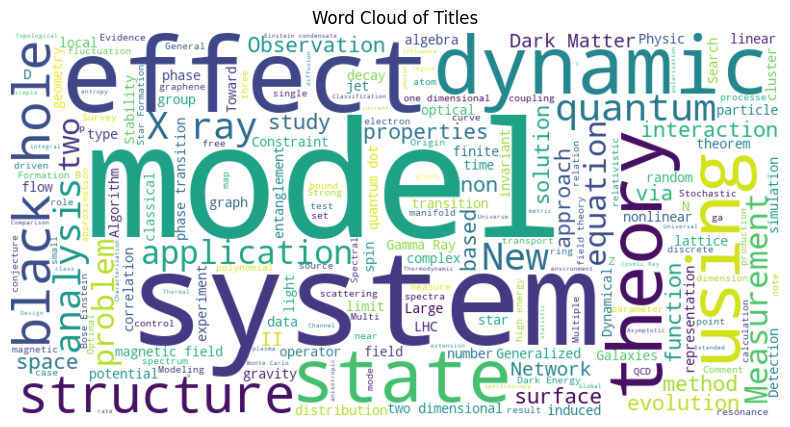

In [259]:
titles_text = ' '.join(dataset_cleaned['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

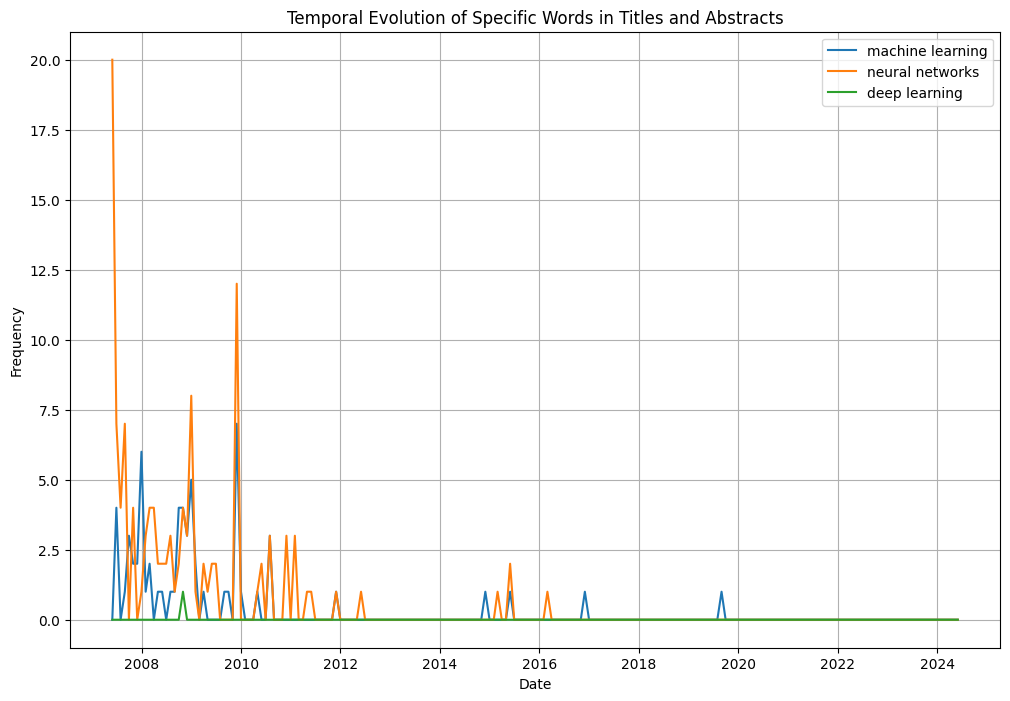

In [269]:
dataset_cleaned['update_date'] = pd.to_datetime(dataset_cleaned['update_date'], errors='coerce')

# Define specific issues you want to track
specific_issues = ['machine learning', 'neural networks', 'deep learning']

# Initialize a dictionary to store counts of specific words for each issue
issue_word_counts = {issue: [] for issue in specific_issues}

# Iterate through each specific issue
for issue in specific_issues:
    # Count occurrences of the specific word within titles and abstracts for each month
    monthly_counts = dataset_cleaned.apply(lambda row: row['title'].count(issue) + row['abstract'].count(issue), axis=1)
    monthly_counts.index = dataset_cleaned['update_date']
    monthly_counts = monthly_counts.resample('M').sum()
    issue_word_counts[issue] = monthly_counts

# Plot the temporal evolution of specific words for each issue
plt.figure(figsize=(12, 8))
for issue in specific_issues:
    plt.plot(issue_word_counts[issue], label=issue)

plt.title('Temporal Evolution of Specific Words in Titles and Abstracts')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


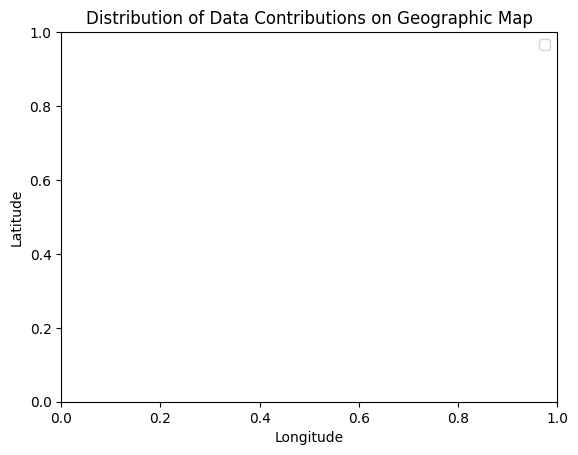

In [274]:

plt.title('Distribution of Data Contributions on Geographic Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the map
plt.show()